# <font color='red'>**EDA- Data preparation**</font>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#!pip install featurewiz
from featurewiz import featurewiz

Imported featurewiz: advanced feature engg and selection library. Version=0.0.42
output = featurewiz(dataname, target, corr_limit=0.70,
                    verbose=2, sep=',', header=0, test_data='',
                    feature_engg='', category_encoders='')
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


## **Import Dataset**

In [2]:
df =pd.read_csv ('/home/jovyan/online_shoppers_intention.csv')

## **Dataset Description**

In [3]:
print (df)

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

In [4]:
df.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### **Data Types**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

><font color='blue'> _**Most of the dataset attributes are numerical, either integers or floats; Revenue(the class label) and Weekend are boolean type**_*</font>

### **Statistical Analysis of the Dataset**


In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### **Count value of Revenue attribute to verify imbalance**

In [7]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

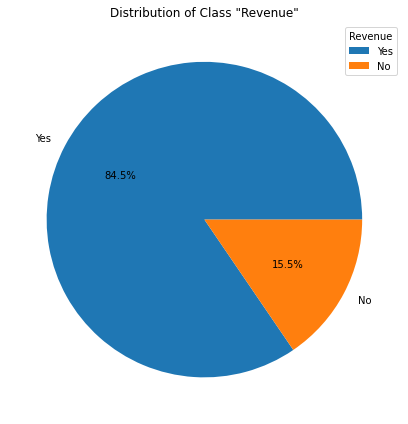

In [8]:
x = df['Revenue'].value_counts()
labels =  ["Yes", "No"]

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(x, labels=labels, autopct='%.1f%%')
ax.set_title('Distribution of Class "Revenue"')
plt.tight_layout()
plt.legend(title = "Revenue")
plt.savefig('output.png', dpi=300, bbox_inches='tight')

### **Missing values in Dataset**

In [9]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

><font color='blue'>_**This dataset doesn't have missing values, no actions are needed**_</font>

### **Data type transformation**

In [10]:
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')

><font color='blue'>_**The attributes Revenue and Weekend were changed from boolean into binary, use them more easily for calculations**_</font>

In [11]:
d_month = {'Jan':1,'Feb':2, 'Mar':3,'Apr':4, 'May':5, 'June':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10,'Nov':11, 'Dec':12}
d_visitor = {'Returning_Visitor': 1,'New_Visitor':2, 'Other':3}
df.Month = df.Month.map(d_month)
df.VisitorType = df.VisitorType.map(d_visitor)


><font color='blue'>_**The attributes Month and Visitor were changed from object into int**_</font>

### **Dataset with modified values**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### **Correlation Analysis**

In [13]:
data_correlation = df.corr()
print(data_correlation)

                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
Month                          0.096713                 0.057885   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487         

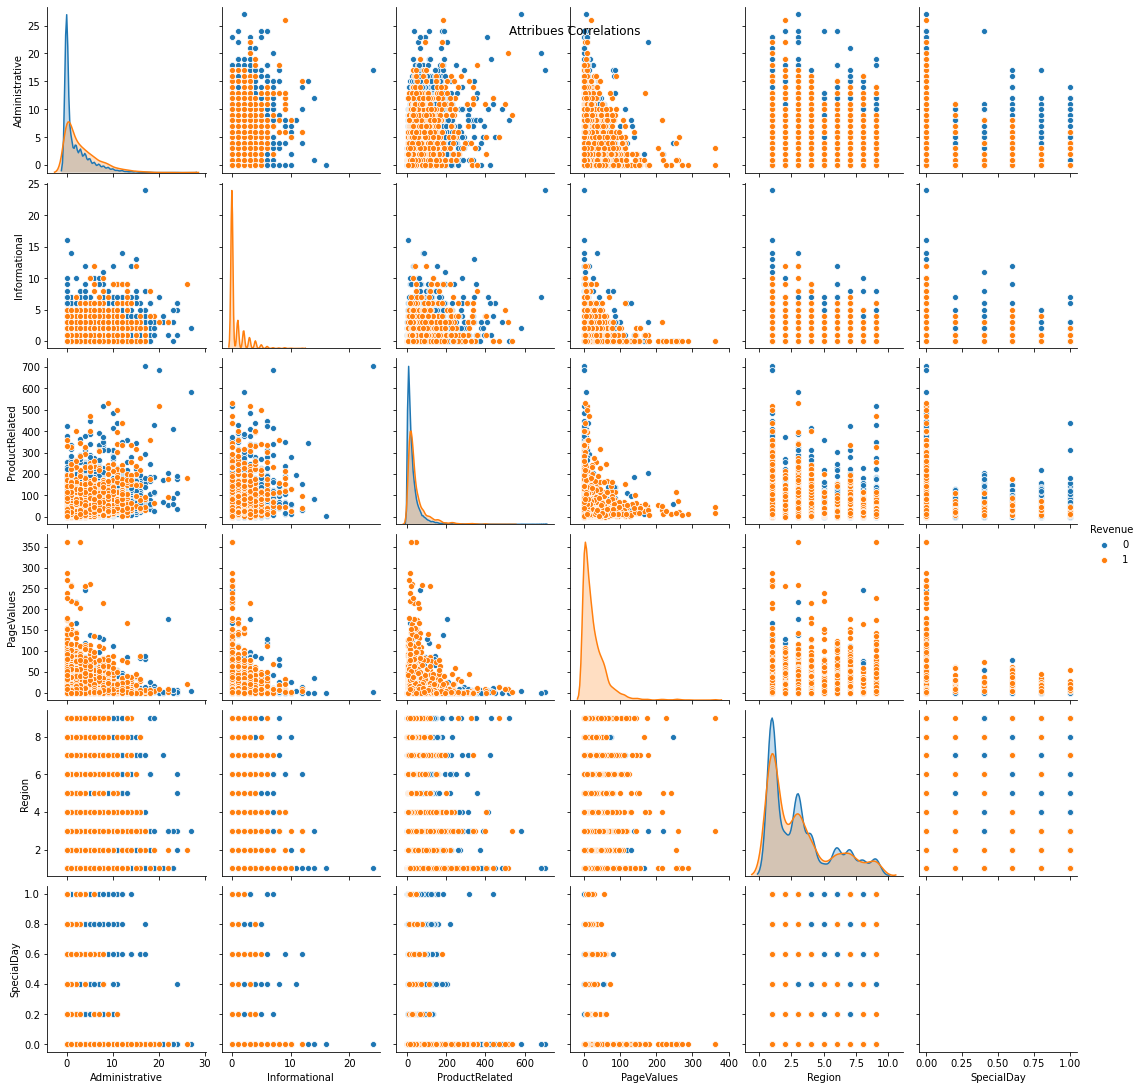

In [14]:
g1 = sns.pairplot(df[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'Region', 'SpecialDay','Revenue']], hue='Revenue')
g1.fig.suptitle('Attribues Correlations')
plt.savefig('output.png', dpi=300, bbox_inches='tight')
plt.show()

><font color='blue'>_**Correlation of Numerical attributes with Revenue**_</font>

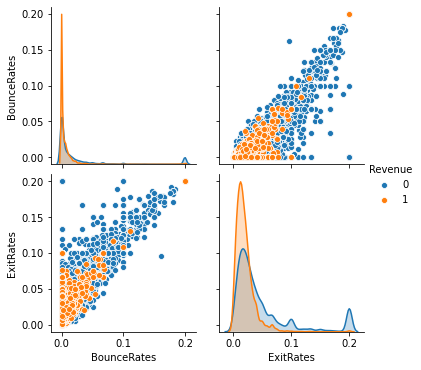

In [15]:
sns.pairplot(df,x_vars=['BounceRates','ExitRates'],y_vars=['BounceRates','ExitRates'],hue='Revenue',diag_kind='kde')
plt.show()

><font color='blue'>_**Correlation of attributes BounceRates and Exit Rates with Revenue**_</font>

### **Correlation Matrix**

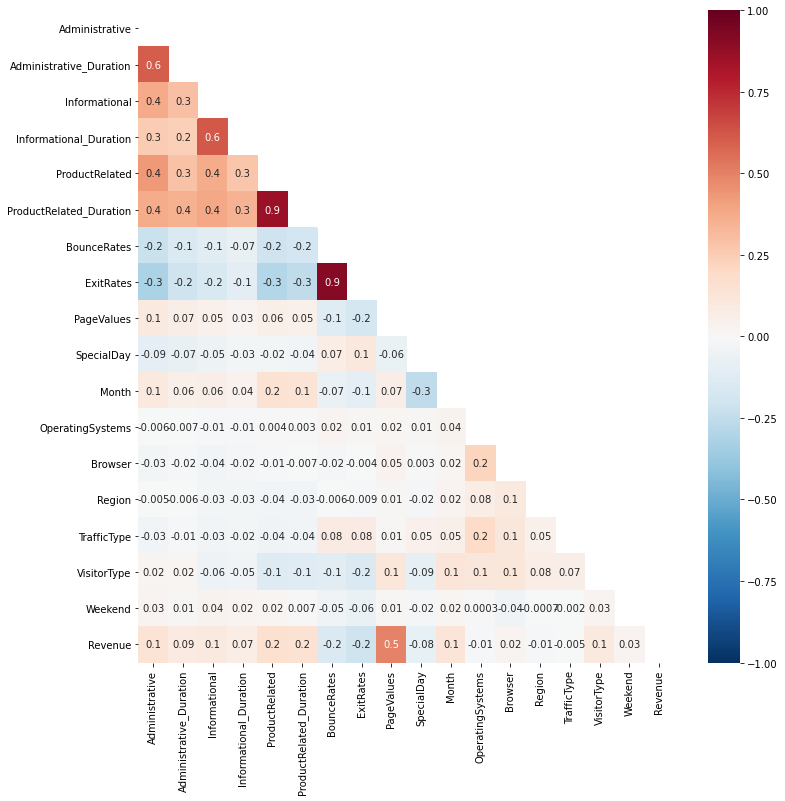

In [16]:
matrix = np.triu(data_correlation)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.savefig('output2.png', dpi=300, bbox_inches='tight')
plt.show()

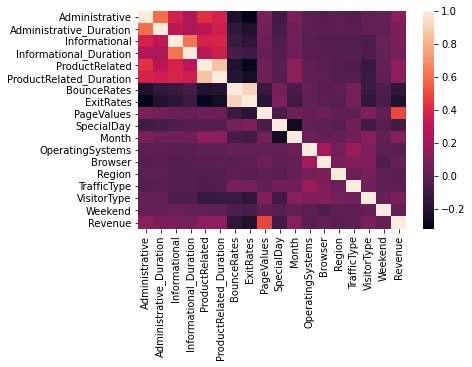

In [17]:
corr =data_correlation
sns.heatmap(corr,
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)

><font color='blue'>_**From the above correlation analysis we can infer the following:**_</font>

- There are only a couple of attributes that have a high correlation of 0.9 with eachother:
    - ProductRelated and ProductRelated_Duration 
    - ExitRates and BounceRates 
- In addition, the following attributes have a moderate correlation:
    - PageValues and Revenue have a correlation of 0.5
    - Administrative and Administrative_Duration & Informational and Informational_Duration have a  correlation of 0.6

## **Boxplot of attributes**

In [18]:
#plt.boxplot(df)
 
# show plot
#plt.show()

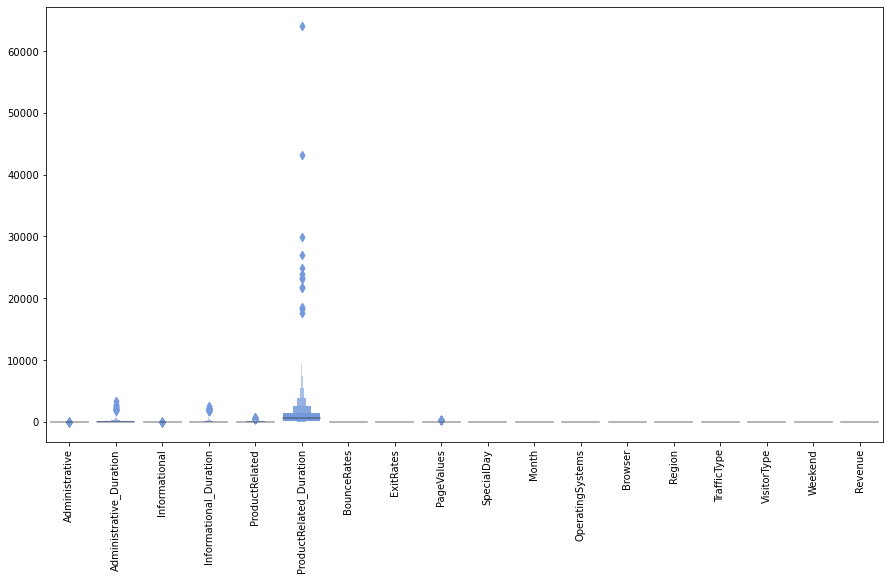

In [19]:
plt.figure(figsize=(15,8))
sns.boxenplot(data = df,color = "cornflowerblue")
plt.xticks(rotation=90)
plt.savefig('output3.png', dpi=300, bbox_inches='tight')
plt.show()

## **Histogram of attributes**

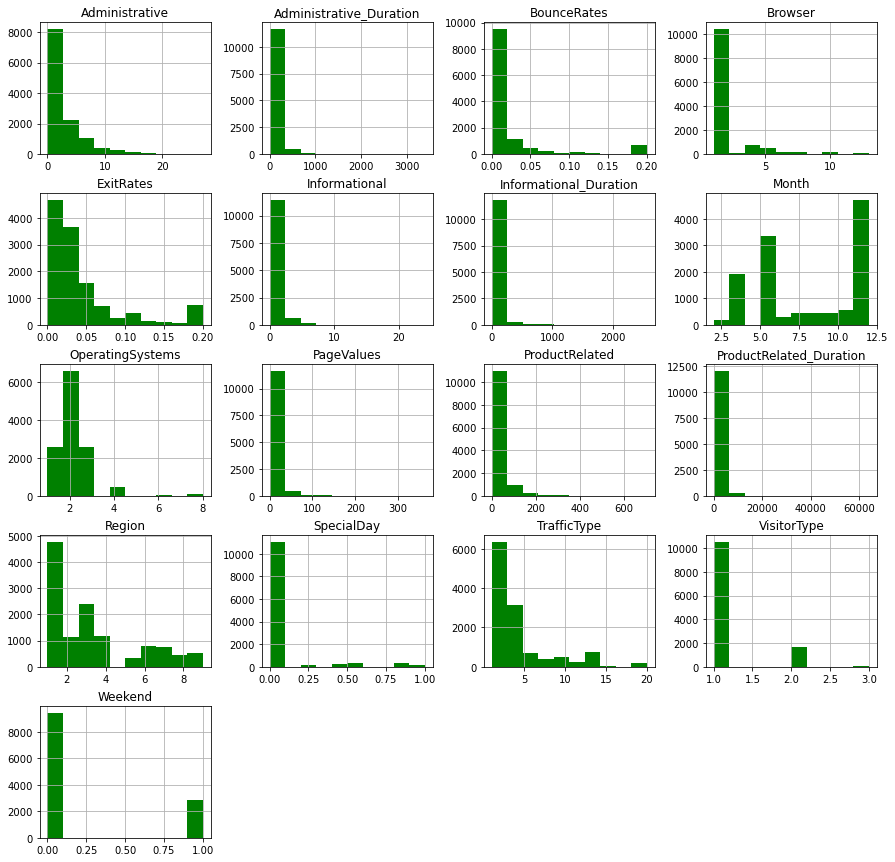

In [20]:
df_X = df.drop(columns=['Revenue'])
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
df_X.hist(ax=ax, color = 'green')
plt.savefig('output4.png', dpi=300, bbox_inches='tight')
plt.show()

## **Distribution of customers activity on a Weekend**

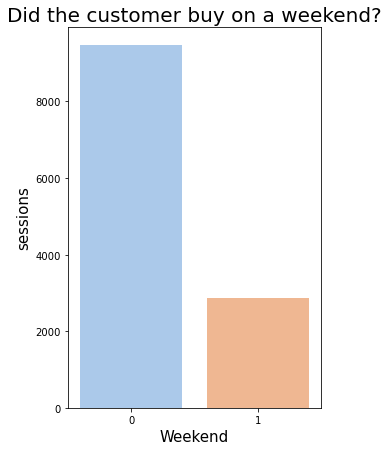

In [21]:
plt.figure(figsize = (10,7))

plt.subplot(1, 2, 1)
sns.countplot(df['Weekend'], palette = 'pastel')
plt.title('Did the customer buy on a weekend?', fontsize = 20)
plt.xlabel('Weekend', fontsize = 15)
plt.ylabel('sessions', fontsize = 15)
plt.savefig('output5.png', dpi=300, bbox_inches='tight')
plt.show()

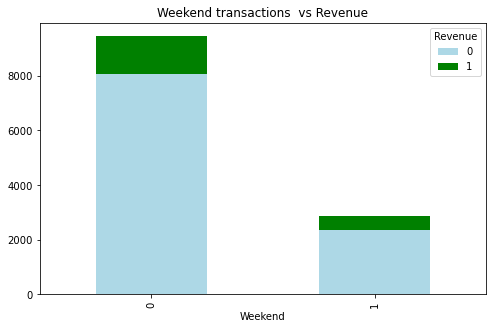

In [22]:
plot1 = pd.crosstab(df['Weekend'], df['Revenue'])
plot1.plot(kind = 'bar', stacked = True, figsize = (8, 5), color = ['lightblue', 'green'])
plt.title('Weekend transactions  vs Revenue')
plt.savefig('output6.png', dpi=300, bbox_inches='tight')
plt.show()

><font color='blue'>_**From the above graphs we can observe that the majority of sessions didn't happen on a weekend and how the revenue per weekend is reflected**_</font>

## **Distribution for Region attribute**

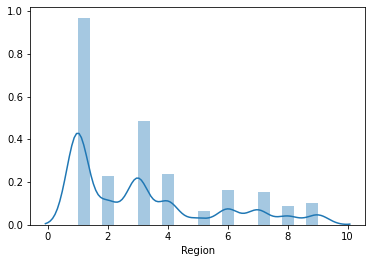

In [23]:
sns.distplot(df['Region'], bins=20)
plt.show()

## **Checking the Distribution of Sales by Region**

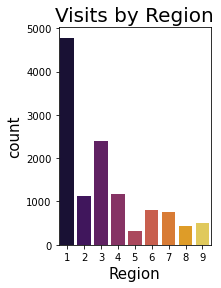

In [24]:
plt.subplot(1, 2, 2)
sns.countplot(df['Region'], palette = 'inferno')
plt.title('Visits by Region', fontsize = 20)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.savefig('output7.png', dpi=300, bbox_inches='tight')

## **Region vs revenue**

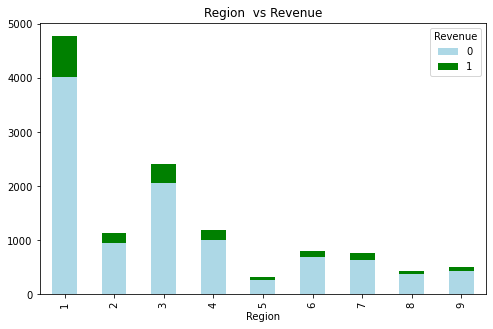

In [25]:
pps = pd.crosstab(df['Region'], df['Revenue'])
pps.plot(kind = 'bar', stacked = True, figsize = (8, 5), color = ['lightblue', 'green'])
plt.title('Region  vs Revenue')
plt.savefig('output8.png', dpi=300, bbox_inches='tight')
plt.show()

><font color='blue'>_**From the above graphs we can observe that the behavior of the sessions by Geographical Region and how it behaves vs Revenue**_</font>

## **Web Pages Analysis**

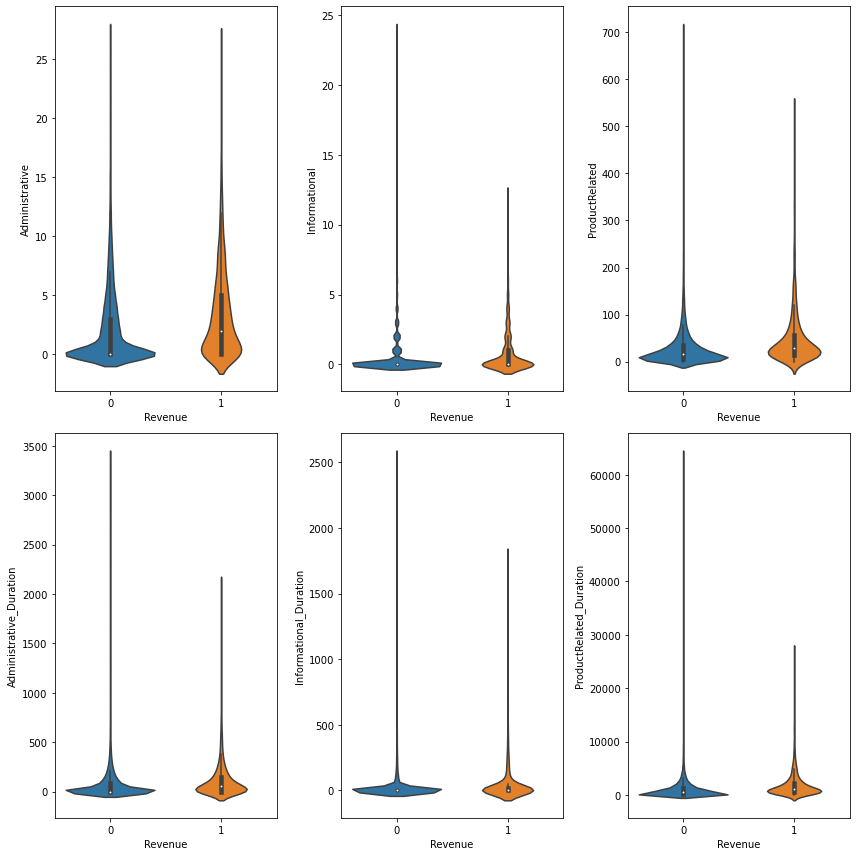

In [26]:
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

sns.violinplot(data=df, x = 'Revenue', y = 'Administrative', ax=ax1)
sns.violinplot(data=df, x = 'Revenue', y = 'Informational', ax=ax2)
sns.violinplot(data=df, x = 'Revenue', y = 'ProductRelated', ax=ax3)
sns.violinplot(data=df, x = 'Revenue', y = 'Administrative_Duration', ax=ax4)
sns.violinplot(data=df, x = 'Revenue', y = 'Informational_Duration', ax=ax5)
sns.violinplot(data=df, x = 'Revenue', y = 'ProductRelated_Duration', ax=ax6)

plt.tight_layout()
plt.savefig('output9.png', dpi=300, bbox_inches='tight')
plt.show()

><font color='blue'>_**From the above graphs we can observe that the distribution of Attributes related to Web Pages vs Revenue**_</font>

## **Number of Visits to "Administrative" type Pages**

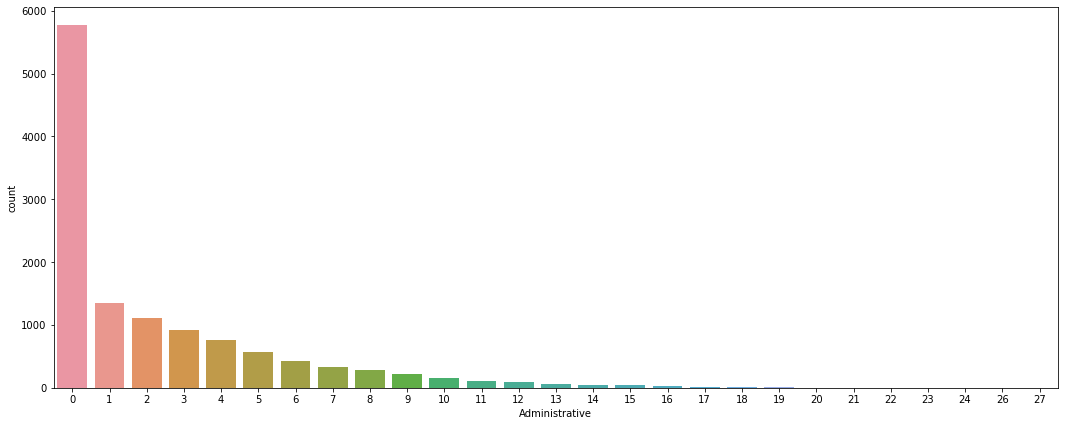

In [27]:
plt.figure(figsize = (18,7))
sns.countplot(df['Administrative'])
plt.show()

## **Distribution of time spent by a user in Administrative Pages**

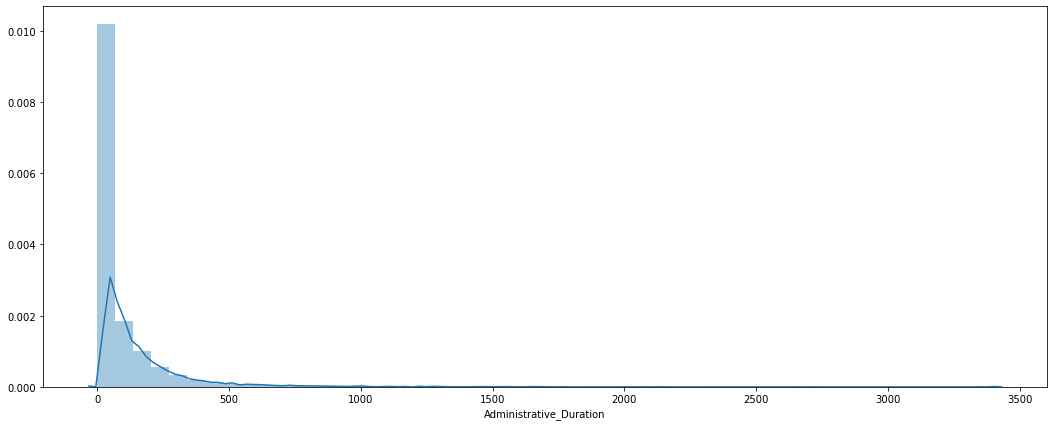

In [28]:
plt.figure(figsize = (18,7))
sns.distplot(df['Administrative_Duration'])
plt.show()

## **Bounce Rates in Administrative Pages**

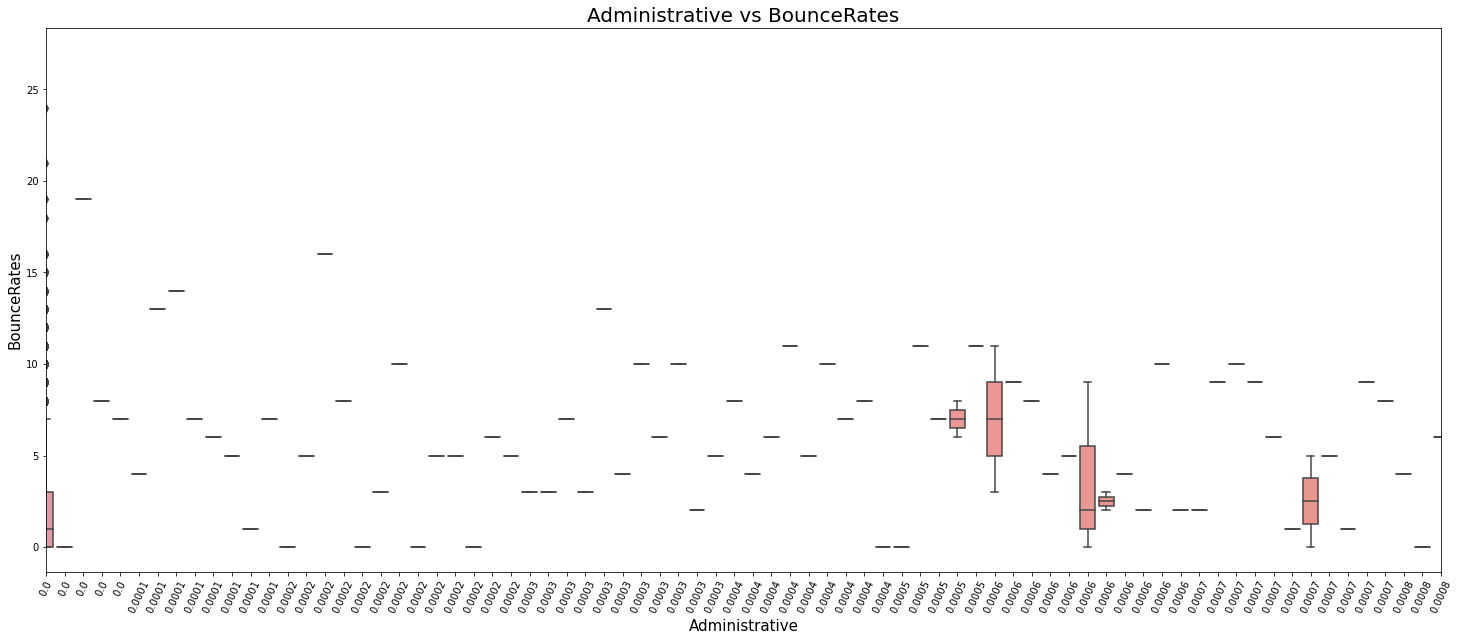

In [29]:
plt.figure(figsize = (25,10))
axa=sns.boxplot(df['BounceRates'], df['Administrative'])
plt.title('Administrative vs BounceRates', fontsize = 20)
plt.xlabel('Administrative', fontsize = 15)
plt.ylabel('BounceRates', fontsize = 15)
labels = [item.get_text() for item in axa
          .get_xticklabels()]
axa.set_xticklabels([str(round(float(label), 4)) for label in labels])
plt.xticks(rotation=65)
plt.xlim(0,75)
plt.show()

## **Percentage of users who enter the website and exit it without triggering any additional tasks after Visiting Administrative Pages**

Text(0.5, 1.0, 'Administrative vs BounceRates.')

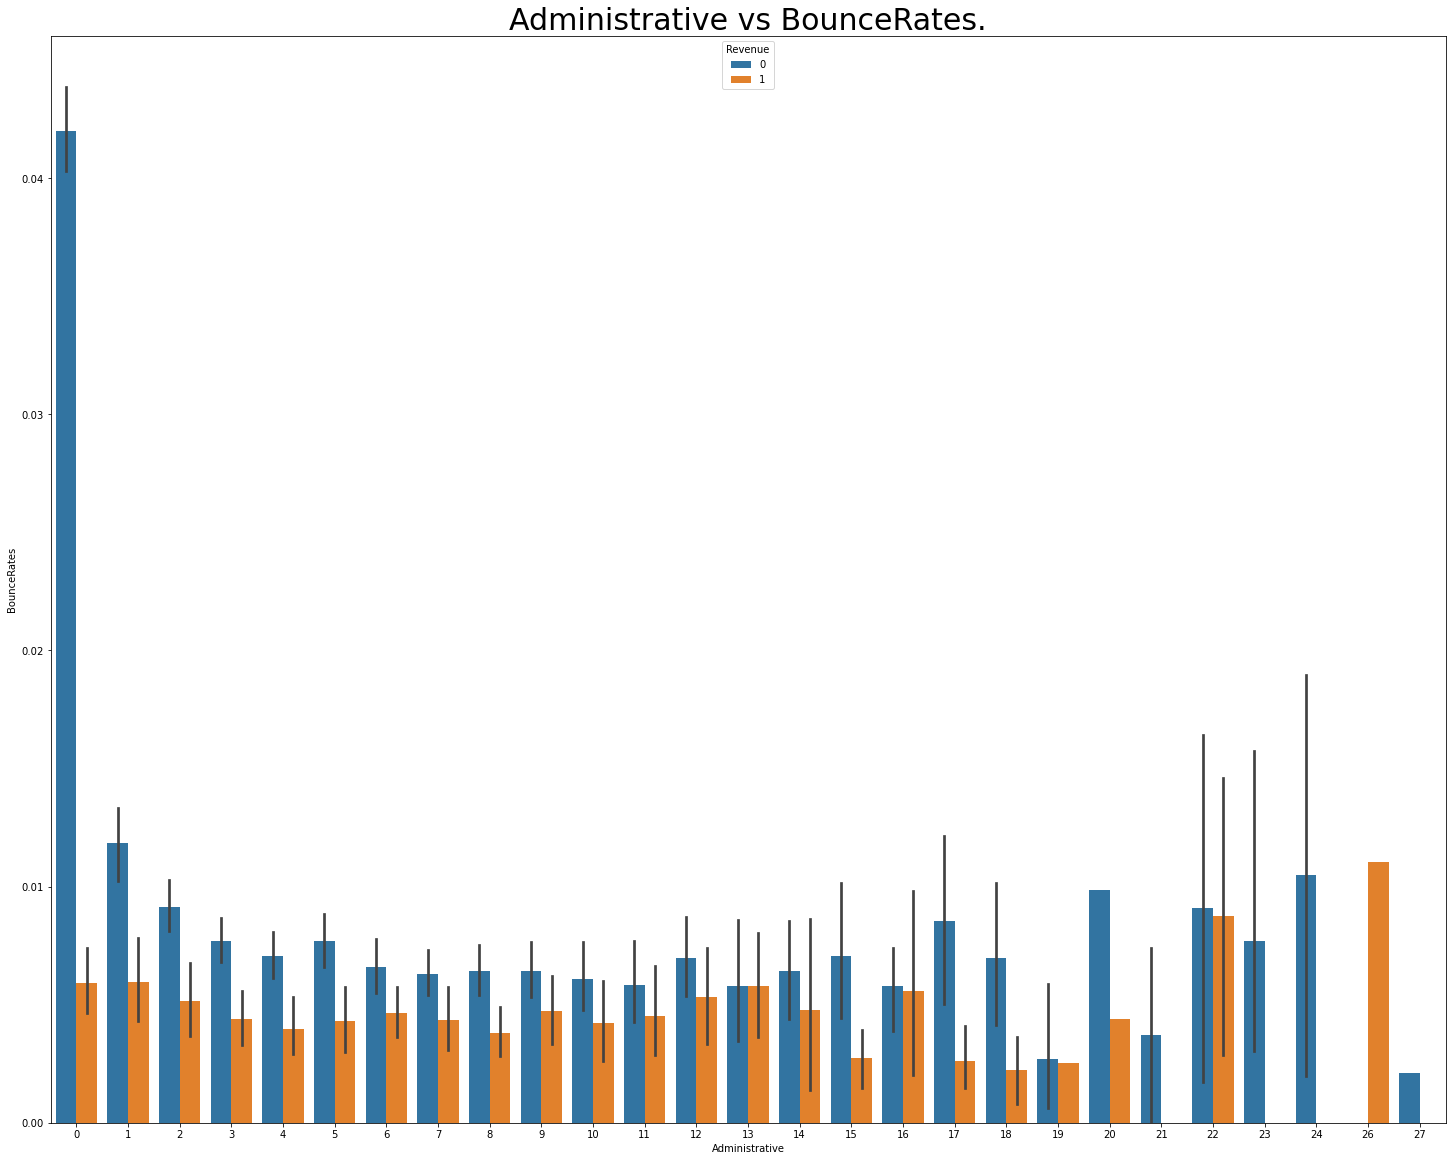

In [30]:
plt.figure(figsize = (25,20))
sns.barplot(x = df['Administrative'], y = df['BounceRates'], hue=df['Revenue'])
plt.title('Administrative vs BounceRates.', fontsize = 30)

## **Revenue measured against visits to Administrative Pages**

Text(0.5, 1.0, 'Administrative vs Revenue.')

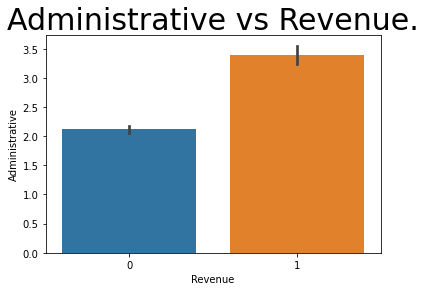

In [31]:
sns.barplot(x = df['Revenue'], y = df['Administrative'])
plt.title('Administrative vs Revenue.', fontsize = 30)

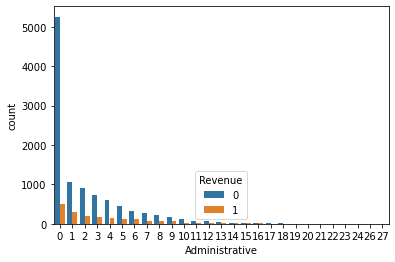

In [32]:
sns.countplot(x=df['Administrative'], hue=df['Revenue'], data=pd.melt(df))
plt.show()

><font color='blue'>_**From the above graphs we can observe that the behavior of a user after visting an "Administrative" page on the website, and how it relates to the Class label Revenue and the attribute "BounceRates"**_</font>

## **Number of Visits to "Informational" type Pages**

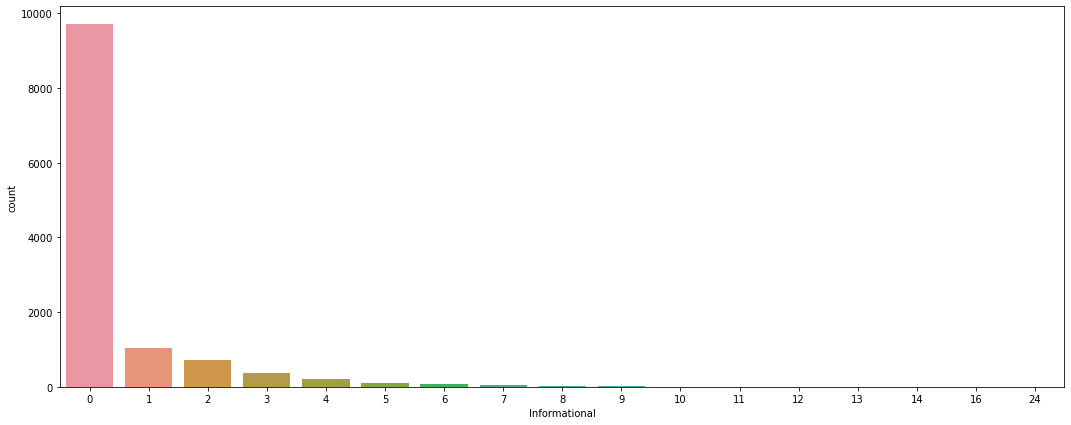

In [33]:
plt.figure(figsize = (18,7))
sns.countplot(df['Informational'])
plt.show()

## **Distribution of time spent by a user in Informational Pages**

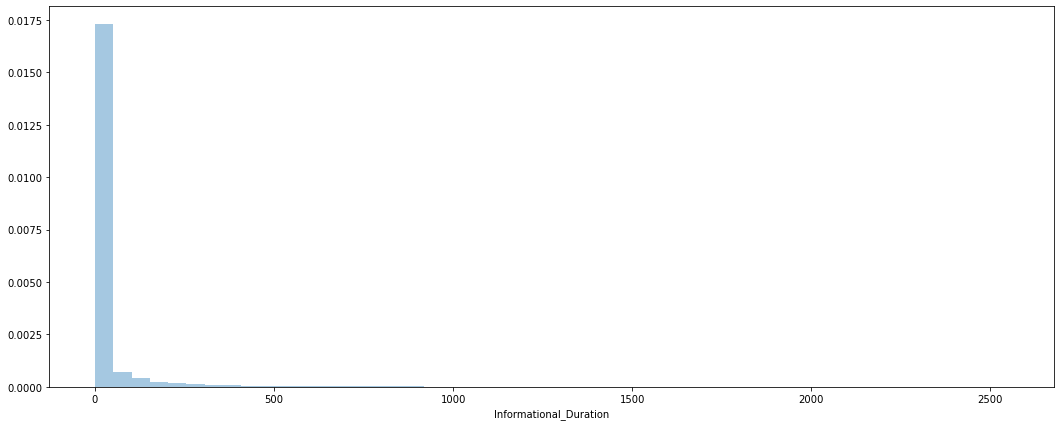

In [34]:
plt.figure(figsize = (18,7))
sns.distplot(df['Informational_Duration'])
plt.show()

## **Bounce Rates in Informational Pages**

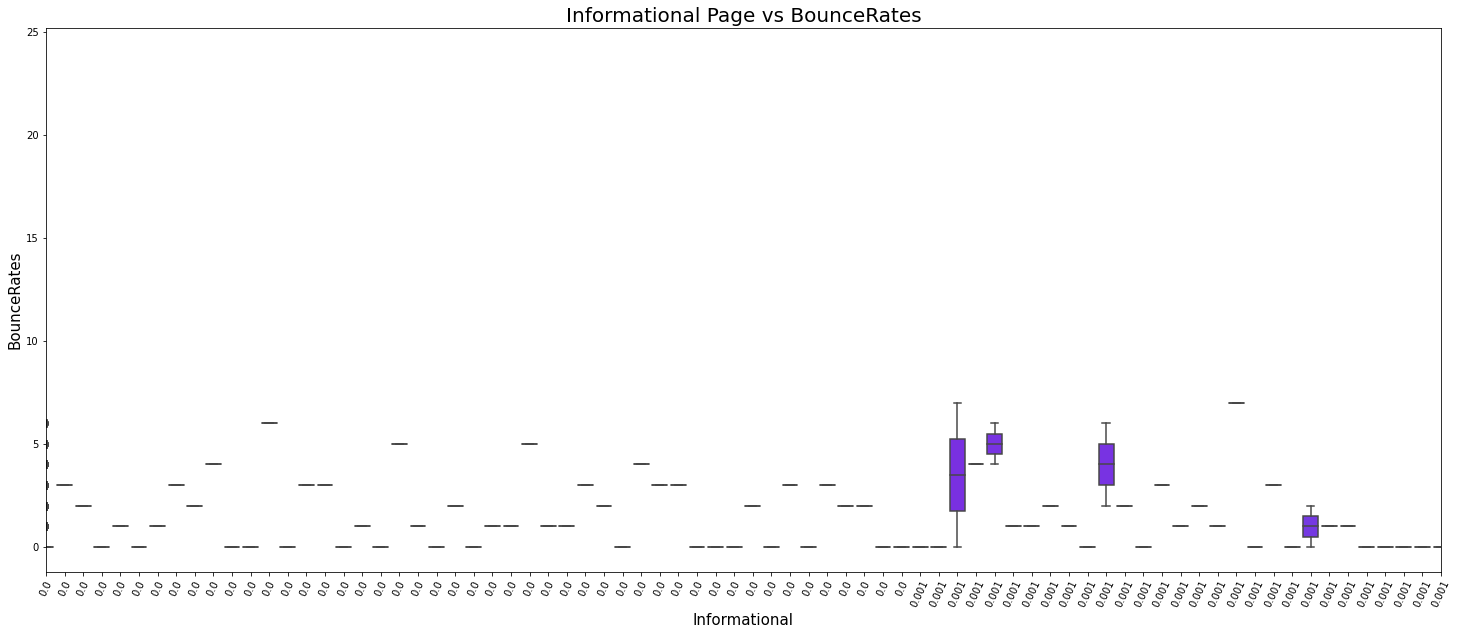

In [35]:
plt.figure(figsize = (25,10))
axd=sns.boxplot(df['BounceRates'],df['Informational'], palette = 'rainbow')
plt.title('Informational Page vs BounceRates', fontsize = 20)
plt.xlabel('Informational', fontsize = 15)
plt.ylabel('BounceRates', fontsize = 15)
labels = [item.get_text() for item in axd
          .get_xticklabels()]
axd.set_xticklabels([str(round(float(label), 3)) for label in labels])
plt.xticks(rotation=65)
plt.xlim(0,75)
plt.show()

## **Percentage of users who enter the website and exit it without triggering any additional tasks after Visiting Administrative Pages**

Text(0.5, 1.0, 'Informational vs BounceRates.')

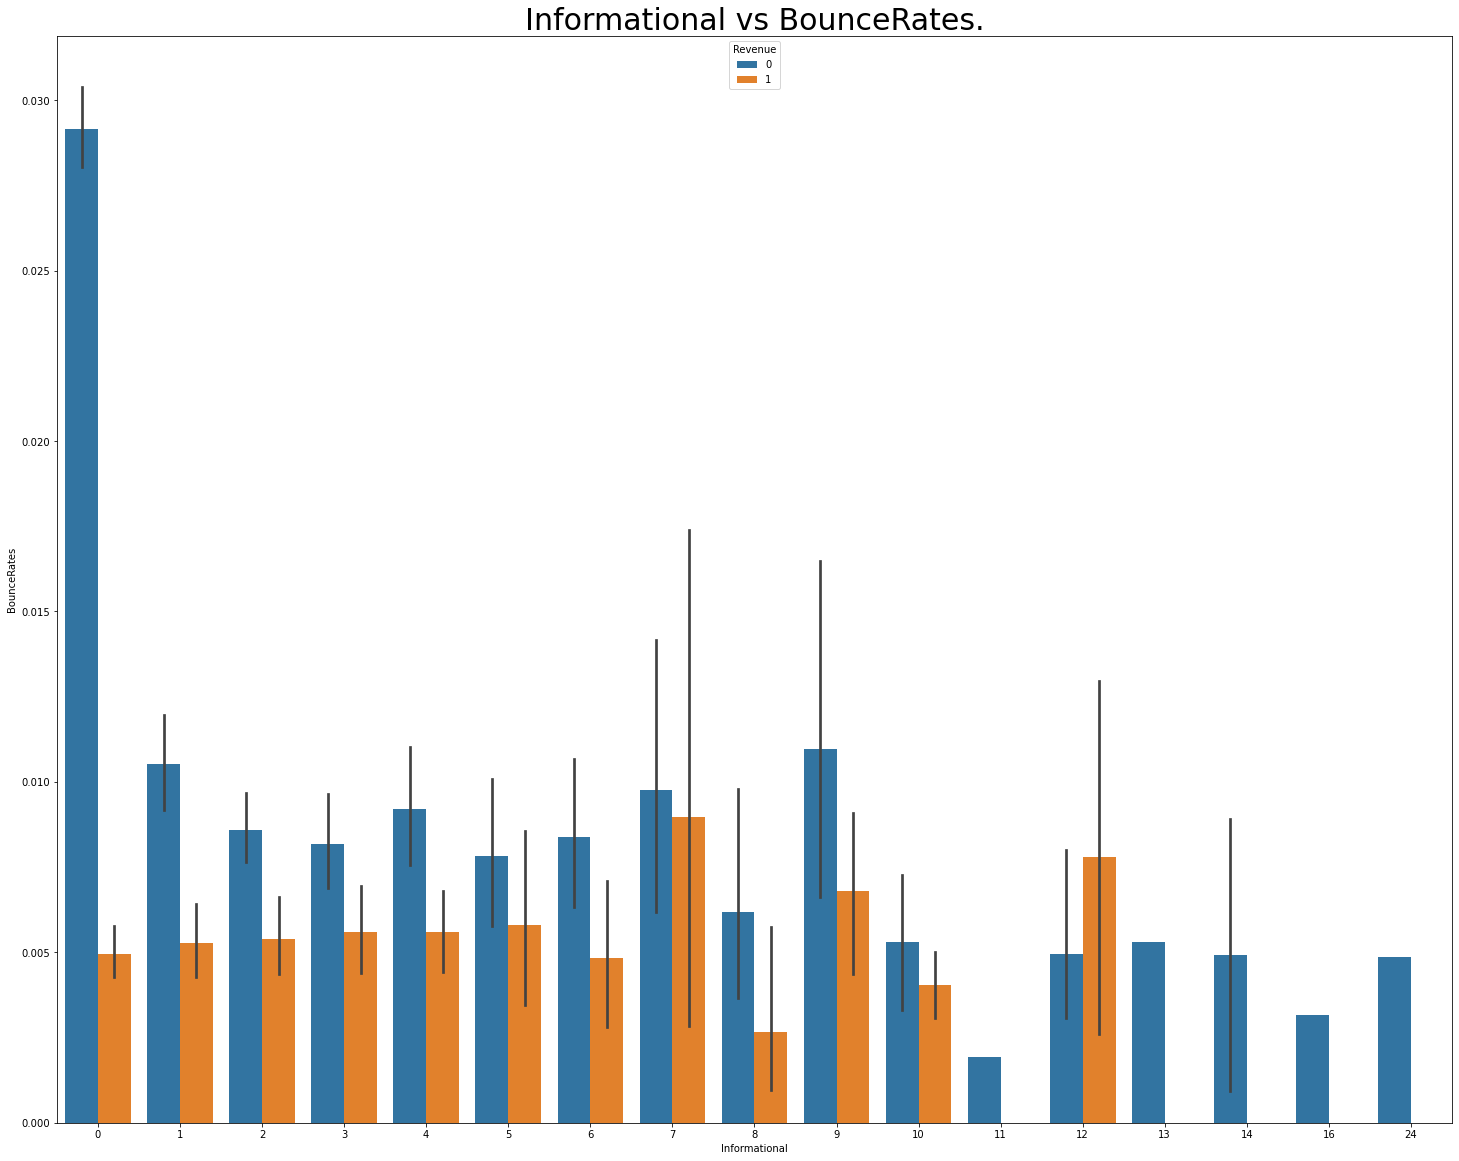

In [36]:
plt.figure(figsize = (25,20))
sns.barplot(x = df['Informational'], y = df['BounceRates'], hue=df['Revenue'])
plt.title('Informational vs BounceRates.', fontsize = 30)

## **Revenue measured against visits to Informational Pages**

Text(0.5, 1.0, 'Informational vs Revenue.')

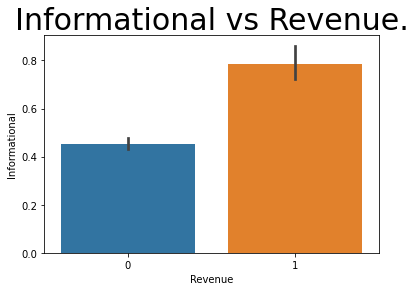

In [37]:
sns.barplot(x = df['Revenue'], y = df['Informational'])
plt.title('Informational vs Revenue.', fontsize = 30)

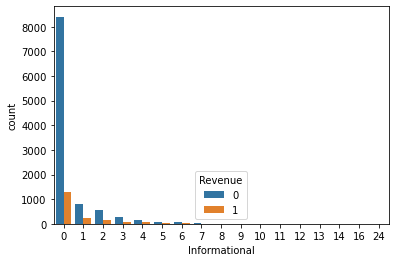

In [38]:
sns.countplot(x=df['Informational'], hue=df['Revenue'], data=pd.melt(df))
plt.show()

><font color='blue'>_**From the above graphs we can observe that the behavior of a user after visting an "Informational" page on the website, and how it relates to the Class label Revenue and the attribute "BounceRates"**_</font>

## **Number of Visits to "Product Related" Pages**

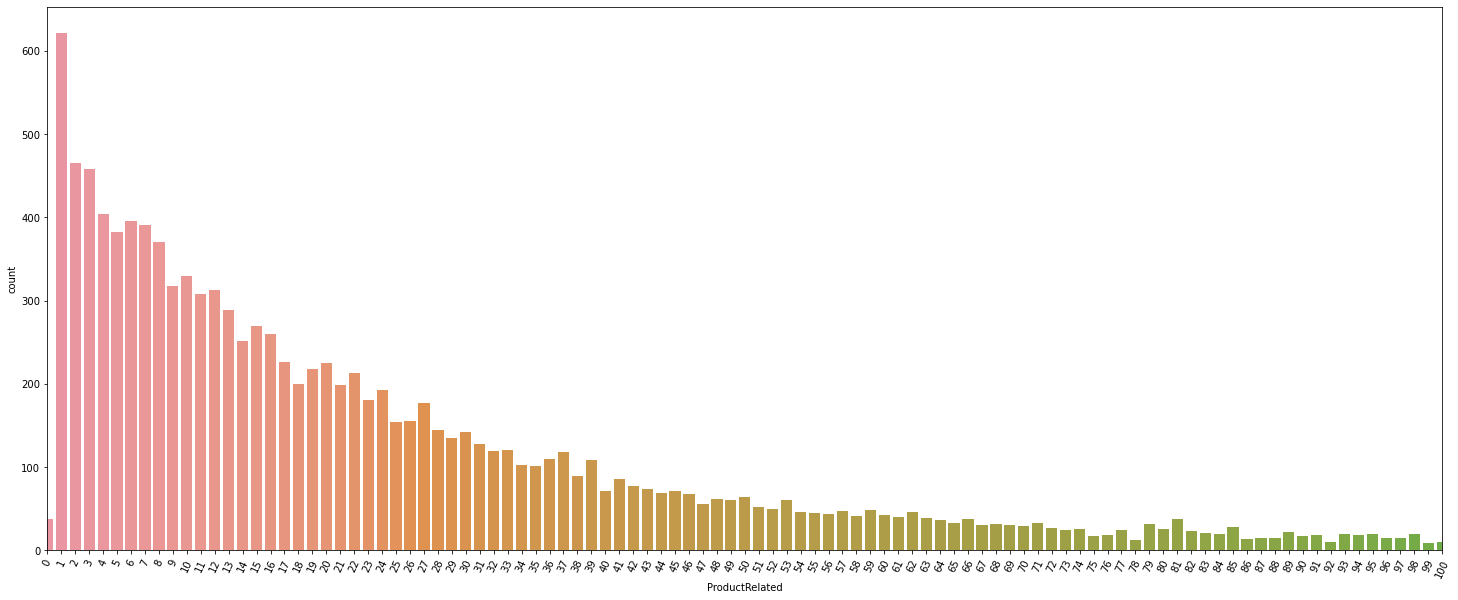

In [39]:
plt.figure(figsize = (25,10))
sns.countplot(df['ProductRelated'])
plt.xlim(0,100)
plt.xticks(rotation=65)
plt.show()

## **Distribution of time spent by a user in Product Related Pages**

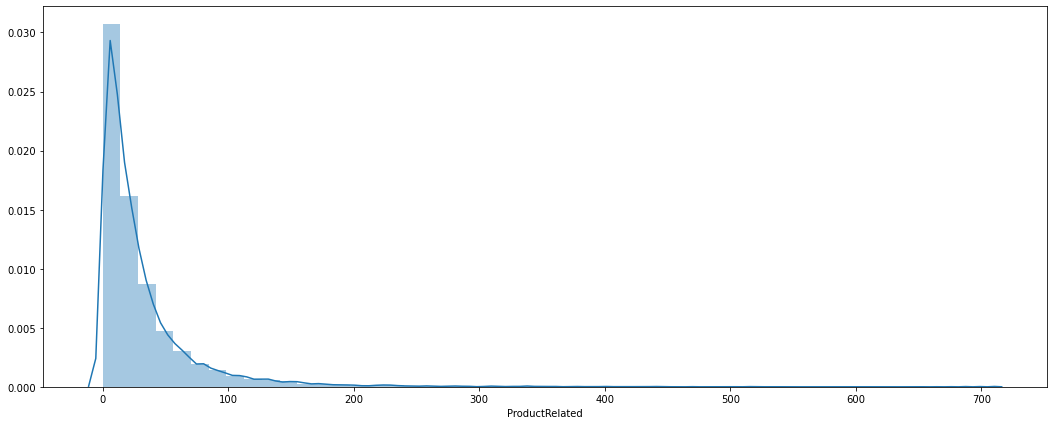

In [40]:
plt.figure(figsize = (18,7))
sns.distplot(df['ProductRelated'])
plt.show()

## **Bounce Rates in ProductRelated Pages**

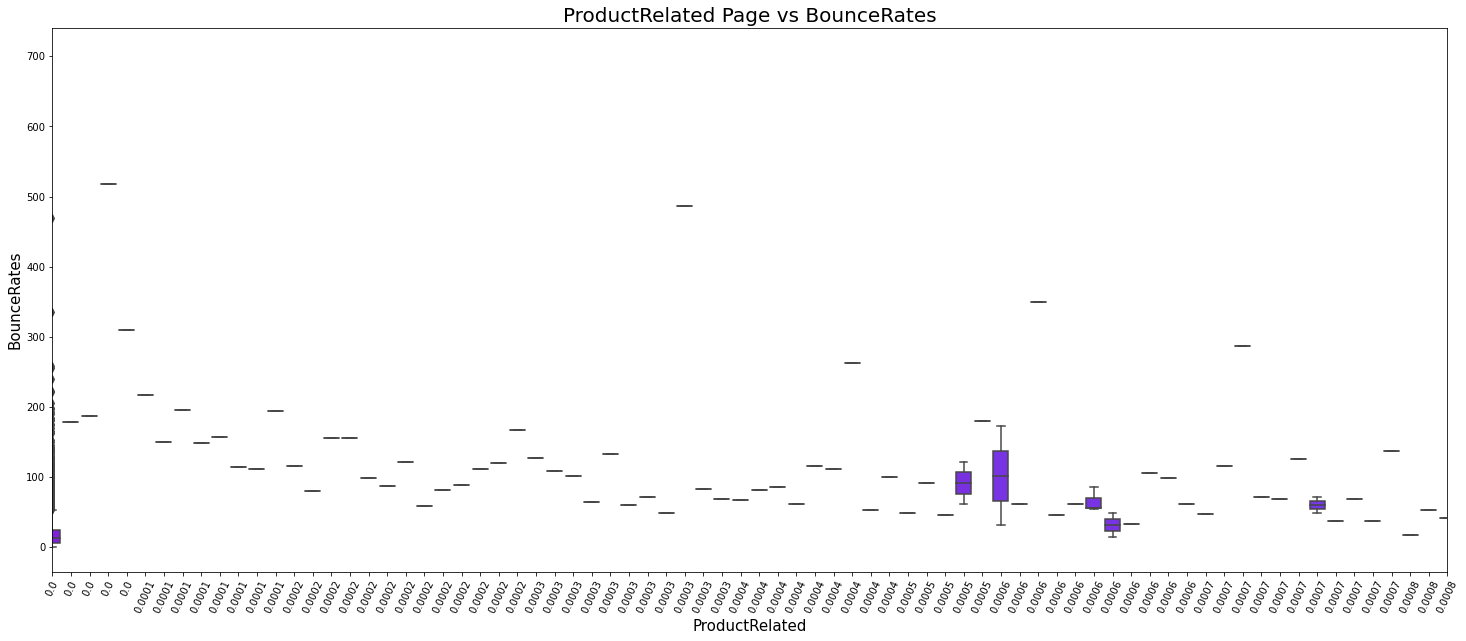

In [41]:
plt.figure(figsize = (25,10))
axp= sns.boxplot(df['BounceRates'], df['ProductRelated'], palette = 'rainbow')
plt.title('ProductRelated Page vs BounceRates', fontsize = 20)
plt.xlabel('ProductRelated', fontsize = 15)
plt.ylabel('BounceRates', fontsize = 15)


labels = [item.get_text() for item in axp.get_xticklabels()]
axp.set_xticklabels([str(round(float(label), 4)) for label in labels])

plt.xticks(rotation=65)
plt.xlim(0,75)
plt.show()

## **Percentage of users who enter the website and exit it without triggering any additional tasks after ProductRelated  Pages**

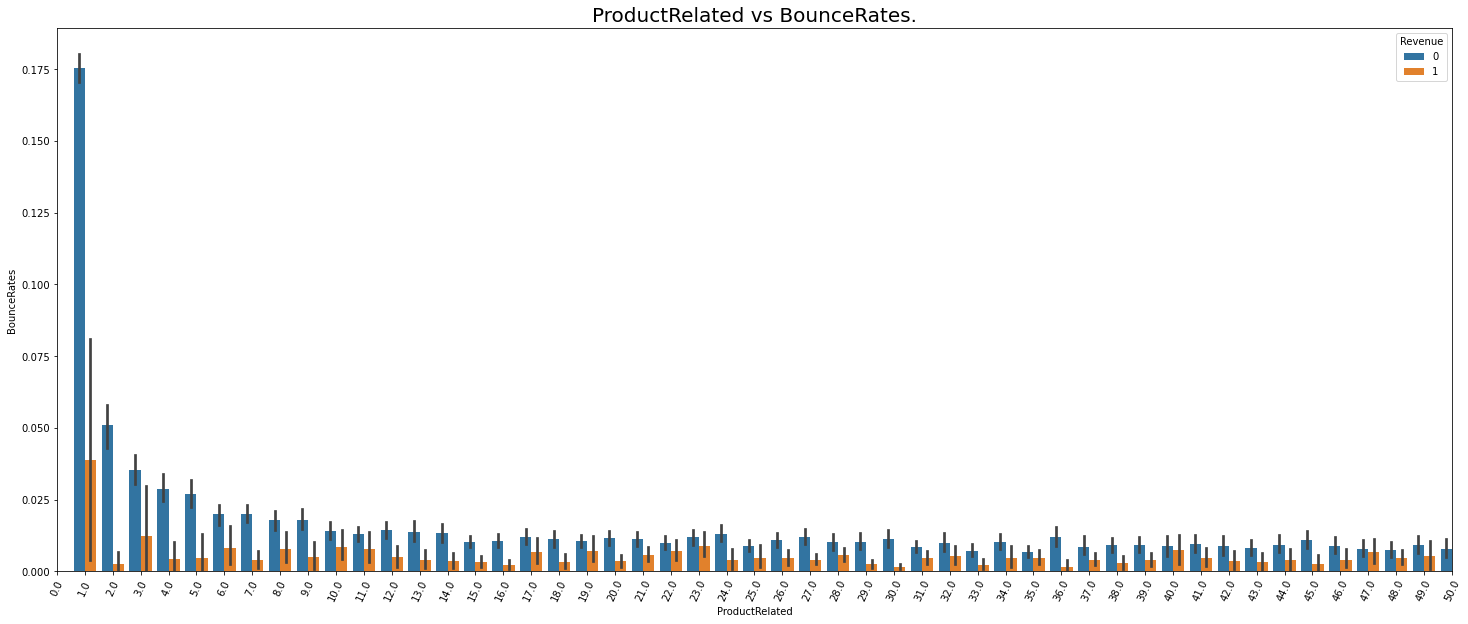

In [42]:
plt.figure(figsize = (25,10))
axx=sns.barplot(x = df['ProductRelated'], y = df['BounceRates'], hue=df['Revenue'])
plt.title('ProductRelated vs BounceRates.', fontsize = 20)
labels = [item.get_text() for item in axx
          .get_xticklabels()]
axx.set_xticklabels([str(round(float(label), 4)) for label in labels])
plt.xticks(rotation=65)
plt.xlim(0,50)
plt.show()

## **Revenue measured against visits to Product Related Pages**

Text(0.5, 1.0, 'ProductRelated vs Revenue.')

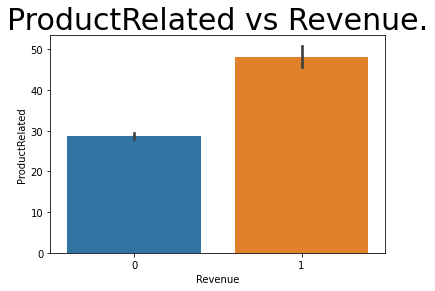

In [43]:
sns.barplot(x = df['Revenue'], y = df['ProductRelated'])
plt.title('ProductRelated vs Revenue.', fontsize = 30)

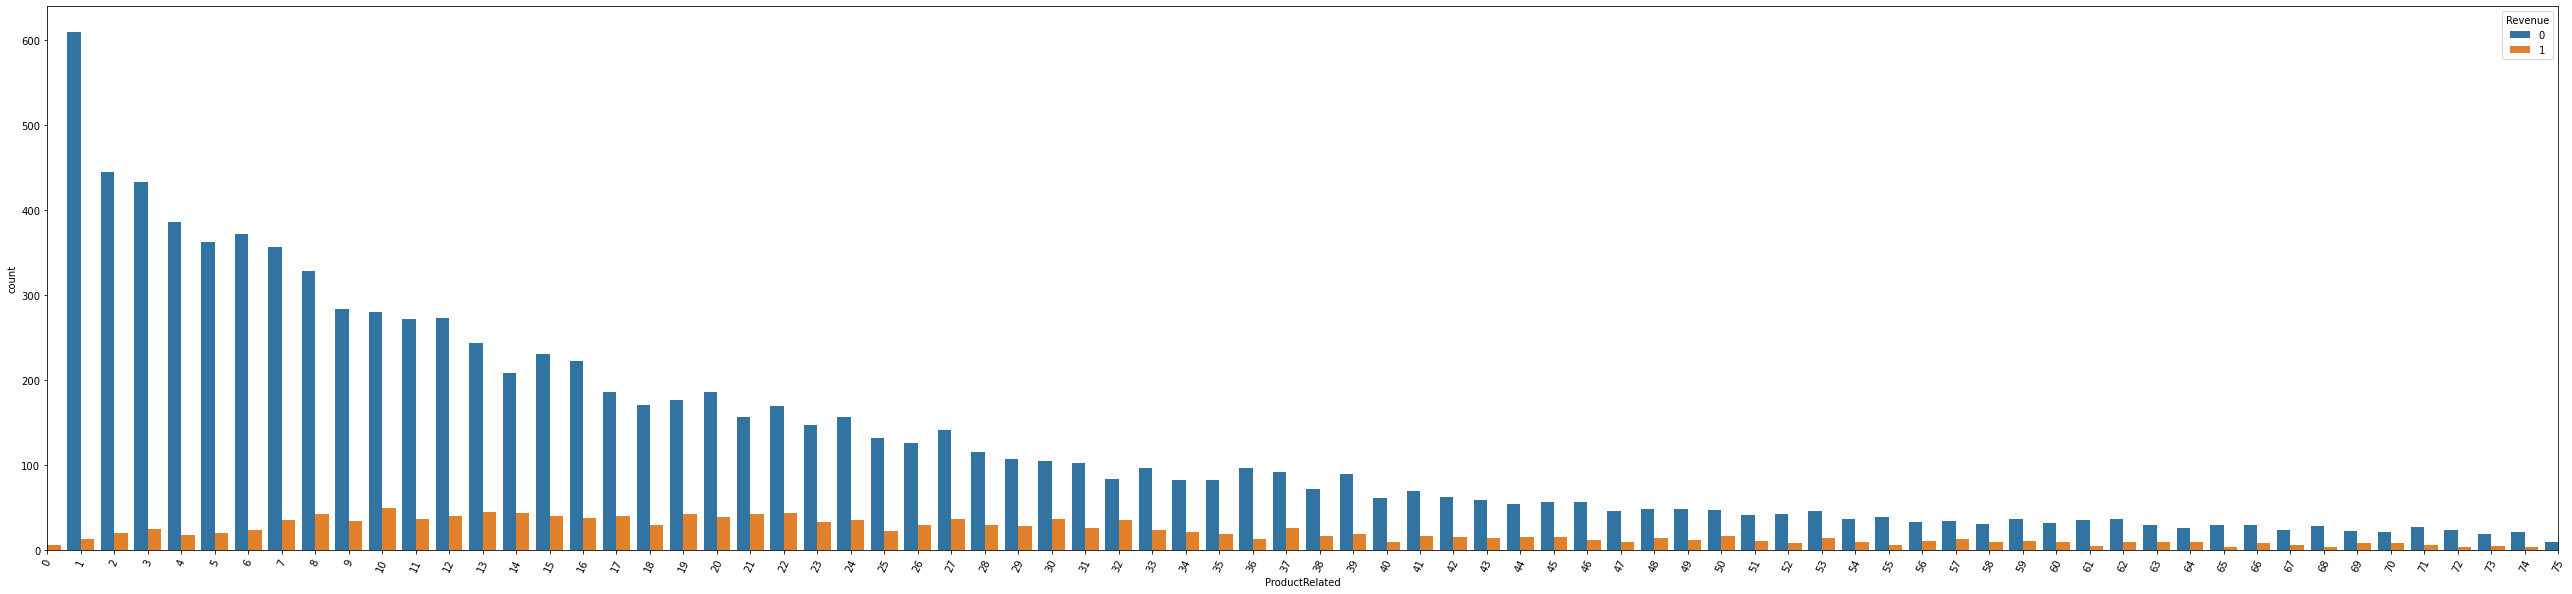

In [44]:
plt.figure(figsize=(45, 10))
sns.countplot(x=df['ProductRelated'], hue=df['Revenue'], data=pd.melt(df))
plt.xlim(0,75)
plt.xticks(rotation=65)
plt.show()

><font color='blue'>_**From the above graphs we can observe that the behavior of a user after visting a "Product Related" page on the website, and how it relates to the Class label Revenue and the attribute "BounceRates"**_</font>

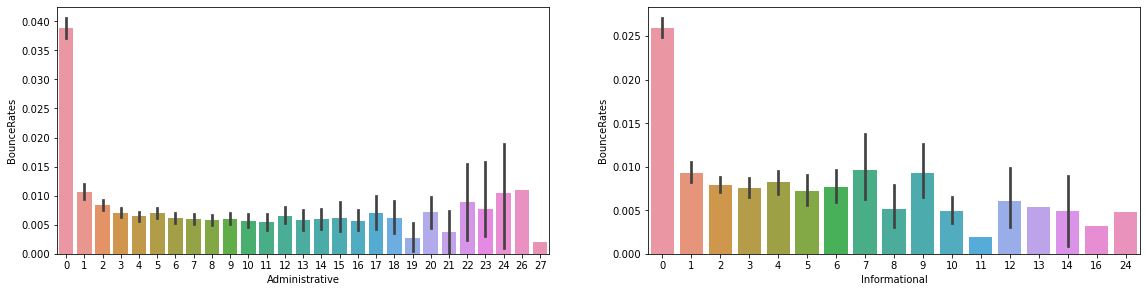

In [45]:
fig = plt.figure(figsize=(30, 10))

x2 = fig.add_subplot(2, 3, 2)
x3 = fig.add_subplot(2, 3, 3)
sns.barplot(x = df['Administrative'], y = df['BounceRates'],ax=x2)
sns.barplot(x = df['Informational'], y=df['BounceRates'], ax=x3)
plt.savefig('output10.png', dpi=300, bbox_inches='tight')
plt.show()

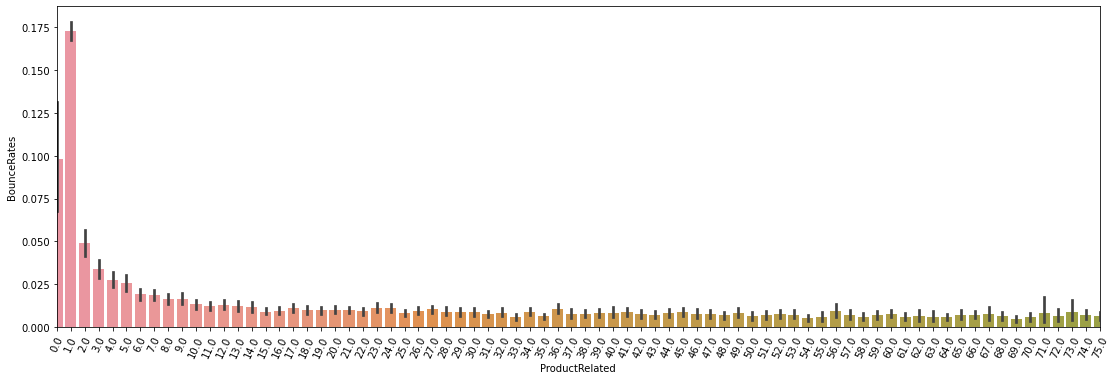

In [46]:
fig = plt.figure(figsize=(45, 10))

fig.add_subplot(2, 3, 1)

plot1=sns.barplot(x = df['ProductRelated'], y = df['BounceRates'])

labels = [item.get_text() for item in axx
          .get_xticklabels()]
plot1.set_xticklabels([str(round(float(label), 4)) for label in labels])
plt.xticks(rotation=65)
plt.xlim(0,75)
plt.tight_layout()
plt.savefig('output11.png', dpi=300, bbox_inches='tight')
plt.show()

><font color='blue'>_**Based on the above comparisons, it can be observed, that "Product Relates type" pages are most likely to have a high Bounce rate, meaning the customer is most likely to not proceed deeper into the website and by doing so, not triggering aditional tasks, this can be understood since it has the more visits that any other type of Pages. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.**_</font>

## **Month sessions analysis**

In [47]:
print(df['Month'].value_counts())

5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month, dtype: int64


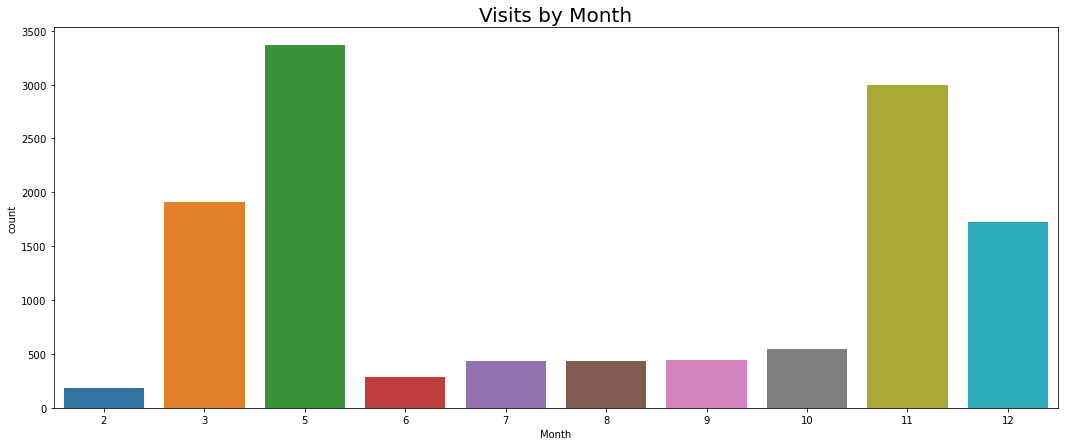

In [48]:
    
plt.figure(figsize = (18,7))
sns.countplot(df['Month'])
plt.title('Visits by Month', fontsize = 20)
plt.show()


## **Revenue by Month**

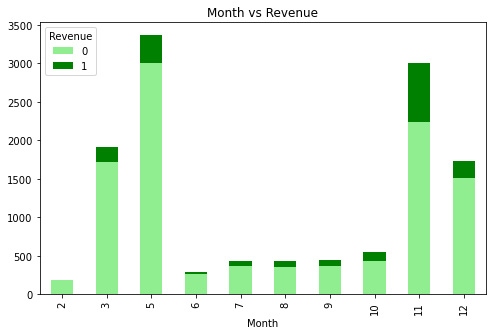

In [49]:
data = pd.crosstab(df['Month'], df['Revenue'])
data.plot(kind = 'bar', stacked = True, figsize = (8, 5), color = ['lightgreen', 'green'])
plt.title('Month vs Revenue')
plt.savefig('output12.png', dpi=300, bbox_inches='tight')
plt.show()

><font color='blue'>_**Based on the above graphs we can observe the following:**_</font>
   - <font color='blue'>**The behavior of sessions by Month, and how it relates to the class label Revenue**</font> 
   -<font color='blue'>**We can note how the months: March, May, November and december have the higher number of visits**</font>
   - <font color='blue'>**We can also observe how November has the highest revenue, we can infer that this is because people buy in advance of the Holidays**</font>

## **Visitor Type analysis**

In [50]:
print(df['VisitorType'].value_counts())

1    10551
2     1694
3       85
Name: VisitorType, dtype: int64


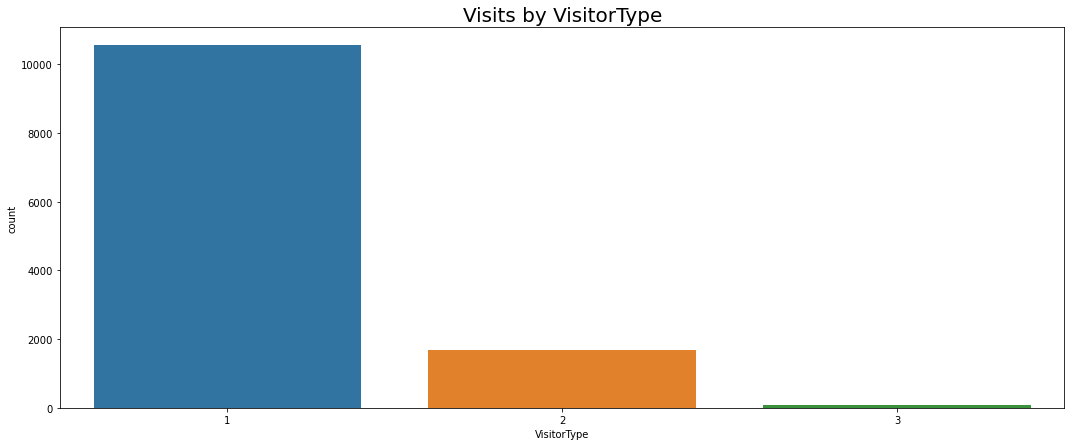

In [51]:
    
plt.figure(figsize = (18,7))
sns.countplot(df['VisitorType'])
plt.title('Visits by VisitorType', fontsize = 20)
plt.show()

## **Visitor Type by Revenue**

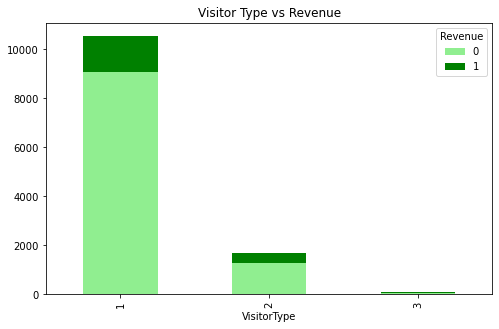

In [52]:
data = pd.crosstab(df['VisitorType'], df['Revenue'])
data.plot(kind = 'bar', stacked = True, figsize = (8, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue')
plt.savefig('output13.png', dpi=300, bbox_inches='tight')
plt.show()

><font color='blue'>_**Based on the above graphs we can observe the following:**_</font>
    Visitor type as “New Visitor,” “Returning Visitor,” and “Other”
   - <font color='blue'>**The number of visits by visitor Type and how it relates to the class label Revenue**</font> 
   - <font color='blue'>**We can note how the Visitor Type 1 "New Visitor" has the higher number of visits**</font>
   - <font color='blue'>**We can also observe how Visitor Type 1 has the highest revenue**</font>

## **Save dataset with modified values to new cvs file**

In [53]:
#df.to_csv('Onlineshoppersdata(1).csv', index=False)

# **Feature Selection using SULOV ( Searching for Uncorrelated List of Variables)**

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from featurewiz import featurewiz
np.random.seed(0)

In [55]:
x = df.drop(['Revenue'],axis=1)
y = df.Revenue.values 
x_scaled =  StandardScaler().fit_transform(x) 
X_train, x_valid, y_train, y_valid = train_test_split(x_scaled,y,test_size = 0.2,stratify=y, random_state=42)
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
# make prediction 
preds = classifier.predict(x_valid) 
# check performance

ac= (accuracy_score(preds,y_valid)*100) 

print('The accuracy is ' + str(round(ac,2)))

The accuracy is 90.31


><font color='blue'> **Automatic feature selection by using featurewiz package**</font>

Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
Shape of your Data Set loaded: (12330, 18)
Loading test data...
    Filename is an empty string or file not able to be loaded
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    17 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
No GPU active on this device
    Running XGBoost using CPU parameters
Removing 0 columns from further processing since ID or low information variables
    columns removed: []
    After removing redundant variables from further processing, features left = 17
#### Single_Label Binary_Classification Feature Selection Started ####
Searching for highly correlated variables from 17 variables using SULOV method
#####  SULOV : Searching for Uncorrelated List Of Variables (takes time..

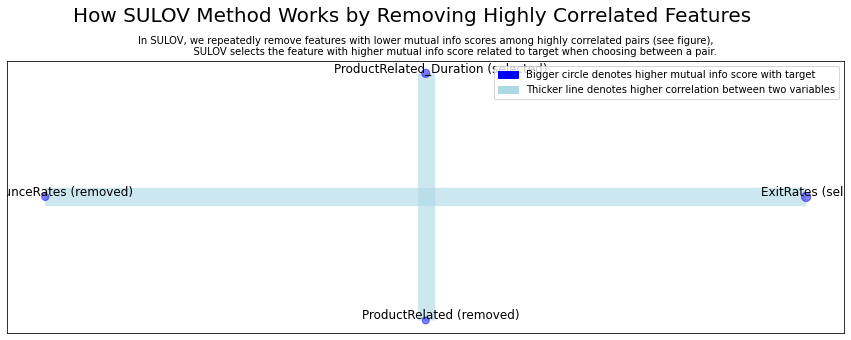

    Adding 0 categorical variables to reduced numeric variables  of 15
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 15 
    Finding Important Features using Boosted Trees algorithm...
        using 15 variables...
        using 12 variables...
        using 9 variables...
        using 6 variables...
        using 3 variables...
Selected 15 important features from your dataset
    Time taken (in seconds) = 308
Returning list of 15 important features and dataframe.


In [57]:
target = 'Revenue'
features, train = featurewiz(df, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [58]:
print(features)

['PageValues', 'Month', 'VisitorType', 'ExitRates', 'ProductRelated_Duration', 'Administrative', 'Administrative_Duration', 'SpecialDay', 'Informational_Duration', 'Informational', 'TrafficType', 'Weekend', 'OperatingSystems', 'Region', 'Browser']


In [59]:
#split data into feature and target
X_new = train.drop(['Revenue'],axis=1)
y = train.Revenue.values 

In [60]:
# preprocessing the features 
X_scaled =  StandardScaler().fit_transform(X_new)

In [61]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2,stratify=y, random_state=42)
# create and train classifier 
classifier = RandomForestClassifier()
 
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
# make prediction 
preds = classifier.predict(X_valid) 
# check performance
ac1= accuracy_score(preds,y_valid)*100 
print('The accuracy of the model with 15 features is ' + str(round(ac1,2)))

The accuracy of the model with 15 features is 89.46


><font color='blue'> **_The model is slightly less accurate when we remove ['ProductRelated', 'BounceRates'] from the list of attributes_**</font>

## **Feature selection using Feature Importance**

In [63]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

X = df.drop(['Revenue'],axis=1)
 
Y = df.Revenue.values 

# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)

importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.05226
Feature: 1, Score: 0.04672
Feature: 2, Score: 0.03031
Feature: 3, Score: 0.02754
Feature: 4, Score: 0.06286
Feature: 5, Score: 0.06243
Feature: 6, Score: 0.05138
Feature: 7, Score: 0.08764
Feature: 8, Score: 0.33959
Feature: 9, Score: 0.00713
Feature: 10, Score: 0.05329
Feature: 11, Score: 0.03190
Feature: 12, Score: 0.03203
Feature: 13, Score: 0.04361
Feature: 14, Score: 0.04254
Feature: 15, Score: 0.01463
Feature: 16, Score: 0.01414


NameError: name 'pyplot' is not defined

><font color='blue'> **_Bar chart to show the feature importance scores for the attributes_**</font>

## **Feature selection using Univariate Selection**

In [ ]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot


X = df.drop(['Revenue'],axis=1)
Y = df.Revenue.values 

bestfeatures = SelectKBest(score_func=chi2, k=17)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(17,'Score'))  #print  features with score

><font color='blue'> **_Univariate feature selection examines each attribute individually to determine the strength of the relationship of it feature with the Class label "Revenue"._**</font>

### <font color='blue'> **After running 3 different feature selection methods, and the three of them ranking the attributes differently. I have decided to not drop any of the attributes to run the Classifiers.**</font>